# Adult Census Income Prediction

----------

In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [387]:
df= pd.read_csv(r"C:\Users\Prem\Documents\adult.csv")

In [388]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory Data Analysis

In [389]:
df.shape

(32561, 15)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [391]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [392]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [393]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [394]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [395]:
df.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [396]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

## Data Visualization

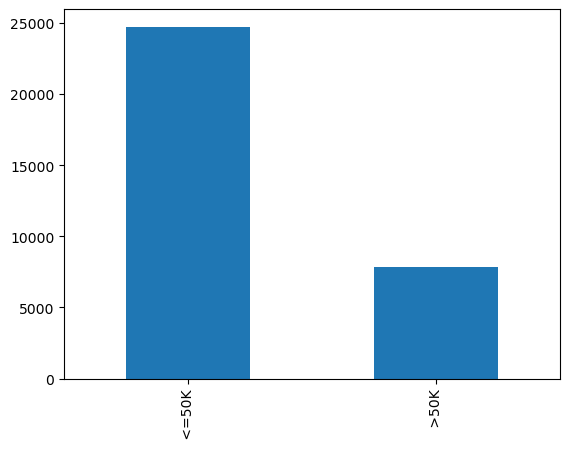

In [397]:
df['salary'].value_counts().plot(kind='bar')
plt.show()

In [398]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [399]:
df['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

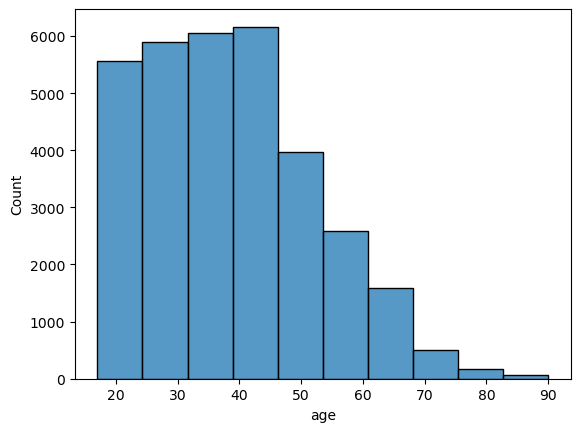

In [400]:
sns.histplot(df['age'], bins=10)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

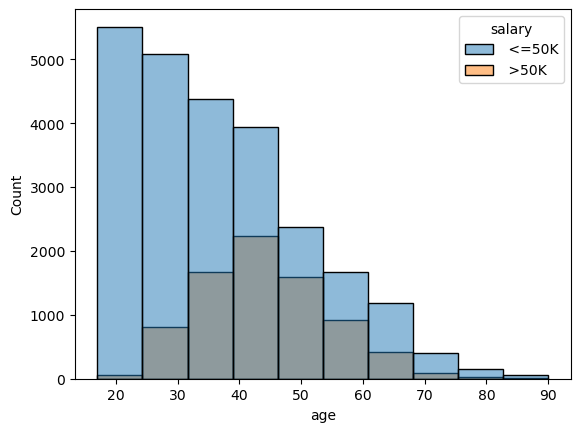

In [401]:
sns.histplot(x=df['age'], hue=df['salary'],bins=10,)

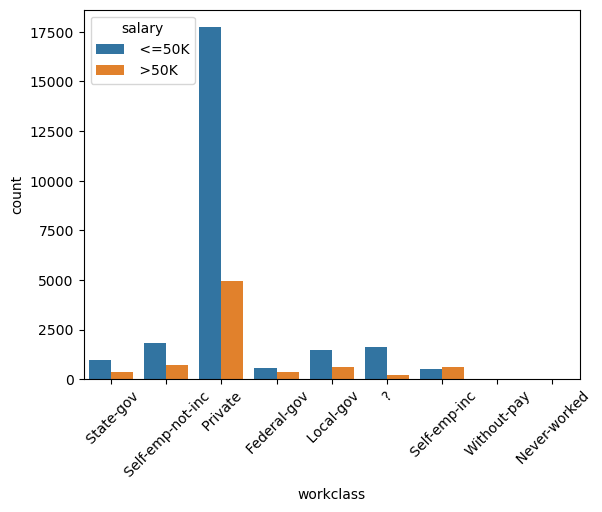

In [402]:
sns.countplot(x=df['workclass'], hue=df['salary'])
plt.xticks(rotation=45)
plt.show()

In [403]:
cat_cols= df.select_dtypes(include=object)

In [404]:
cat_cols.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

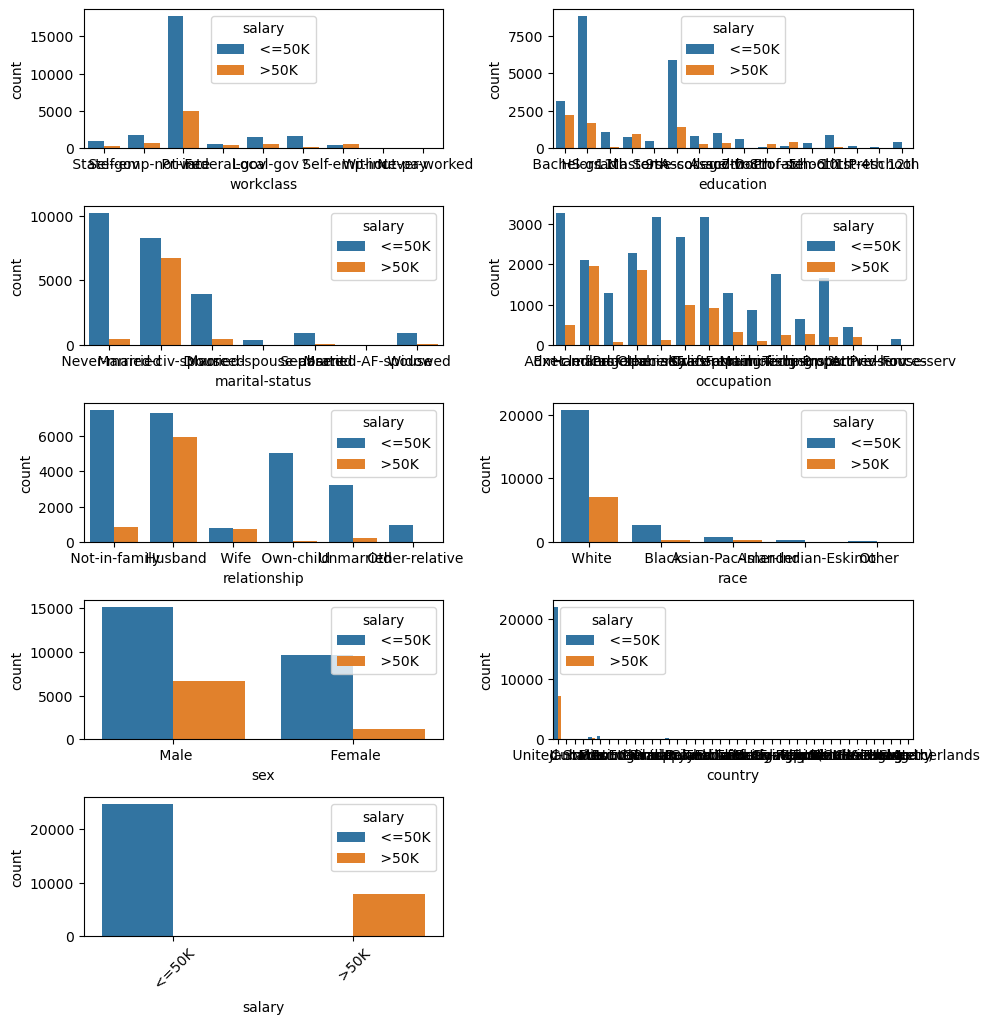

In [405]:
t= 1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(x=df[i],hue=df['salary'])
    t+=1
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [406]:
def edu_cat(enter):
    if (enter==' Preschool'):
        return 'other'
    elif (enter==' 1st-4th'):
        return 'other'
    elif (enter==' 5th-6th'):
        return 'other'
    elif (enter==' 7th-8th'):
        return 'other'
    elif (enter==' 9th'):
        return 'other'
    elif (enter==' 10th'):
        return 'other'
    elif (enter==' 11th'):
        return 'other'
    elif (enter==' 12th'):
        return 'other'
    else:
        return enter

In [407]:
df['education']= df['education'].apply(edu_cat)

In [408]:
df.education.unique()

array([' Bachelors', ' HS-grad', 'other', ' Masters', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' Doctorate', ' Prof-school'],
      dtype=object)

In [409]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [410]:
def married(enter):
    if enter==' Never-married':
        return 'Unmarried'
    elif enter==' Divorced':
        return 'Unmarried'
    elif enter==' Separated':
        return 'Unmarried'
    elif enter==' Widowed':
        return 'Unmarried'
    else:
        return 'married'

In [411]:
df['marital-status']= df['marital-status'].apply(married)

In [412]:
df['marital-status'].unique()

array(['Unmarried', 'married'], dtype=object)

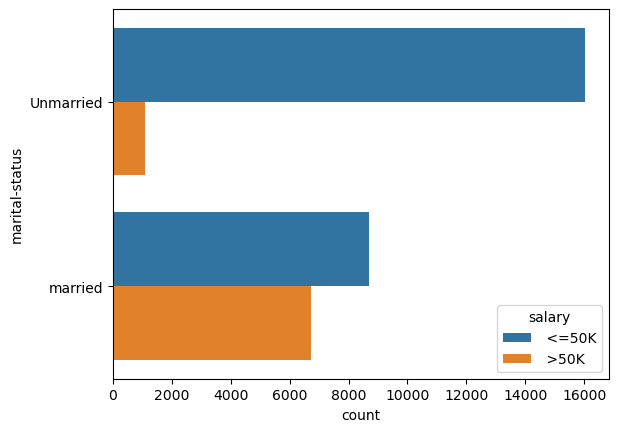

In [413]:
sns.countplot(y=df['marital-status'], hue=df['salary'])
plt.show()

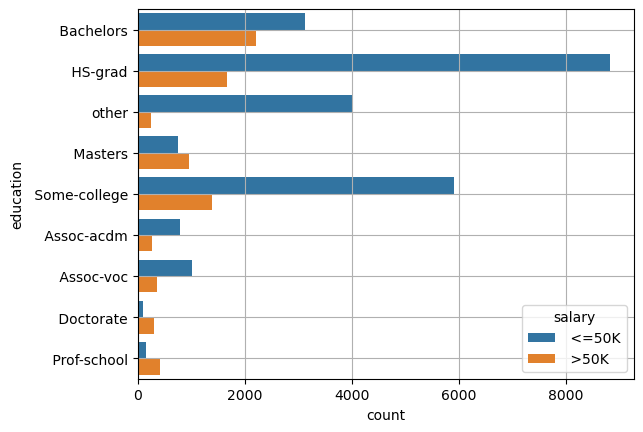

In [414]:
sns.countplot(y=df['education'], hue=df['salary'])
plt.grid(True)
plt.show()

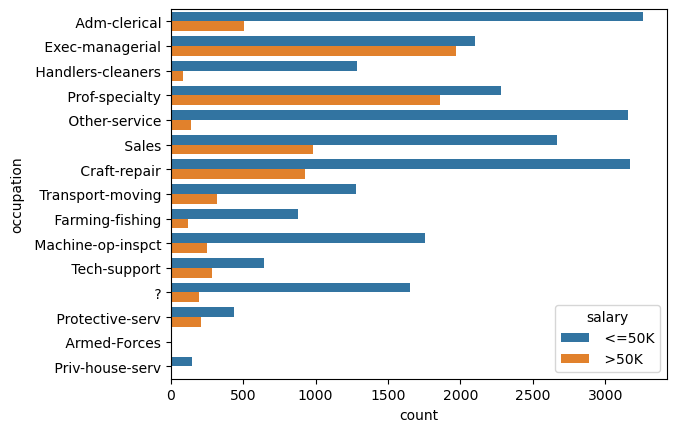

In [415]:
sns.countplot(y=df['occupation'], hue=df['salary'])
plt.show()

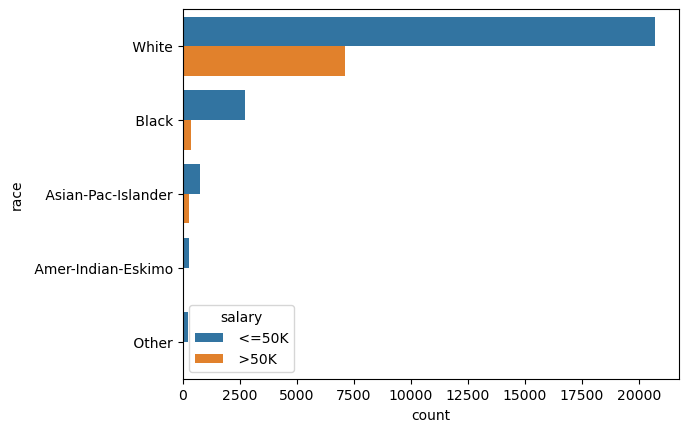

In [416]:
sns.countplot(y=df['race'], hue=df['salary'])
plt.show()

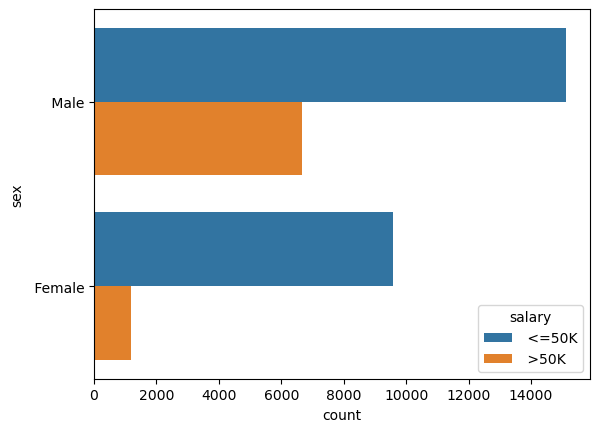

In [417]:
sns.countplot(y=df['sex'], hue=df['salary'])
plt.show()

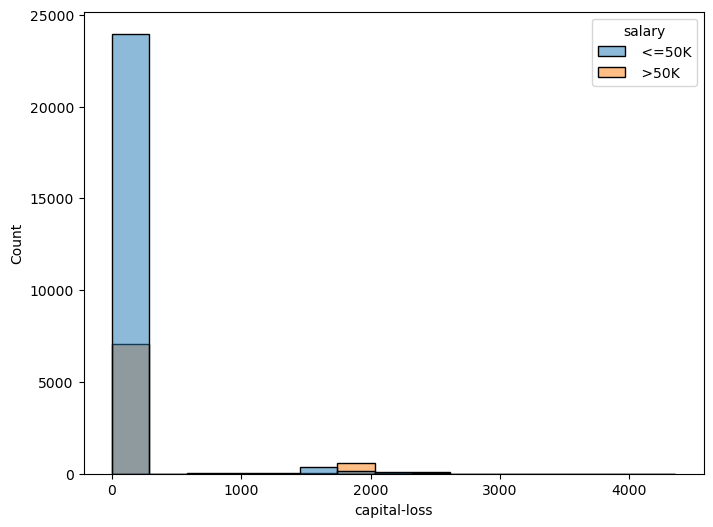

In [418]:
plt.figure(figsize=(8,6))
sns.histplot(x=df['capital-loss'], hue=df['salary'], bins=15)
plt.show()

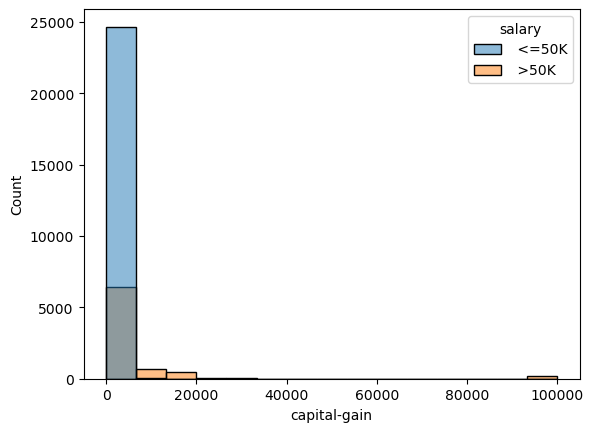

In [419]:
sns.histplot(x=df['capital-gain'], hue=df['salary'], bins=15)
plt.show()

In [420]:
df['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [421]:
def hour_bin(enter):
    if (enter<40):
        return ('<40 hrs')
    elif (enter==40):
        return ('40 hrs')
    else:
        return ('>40 hrs')

In [422]:
df['hours-per-week']= df['hours-per-week'].apply(hour_bin)

<AxesSubplot:>

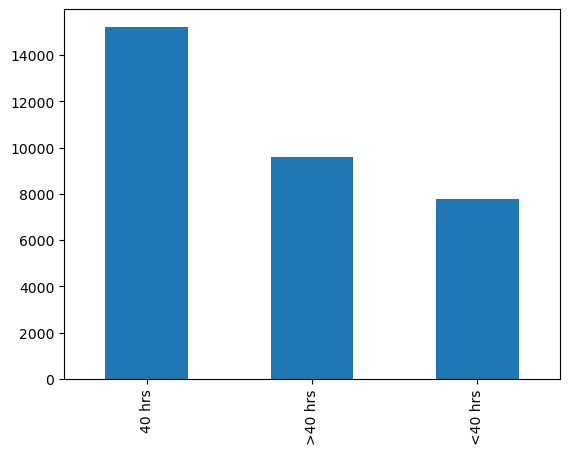

In [423]:
df['hours-per-week'].value_counts().plot(kind='bar')

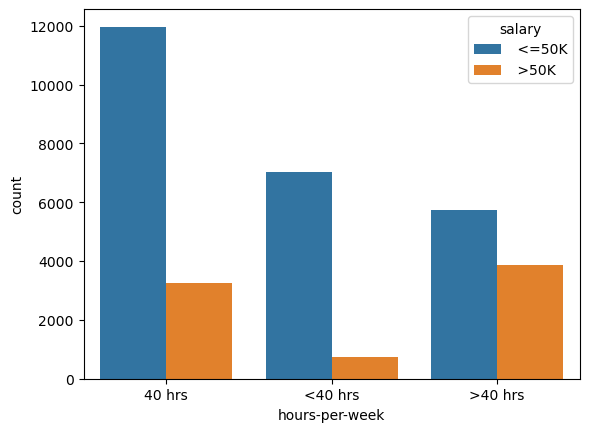

In [424]:
sns.countplot(x=df['hours-per-week'], hue= df['salary'])
plt.show()

In [425]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss
age,1.000000,-0.076646,0.036527,0.077674,0.057775
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000


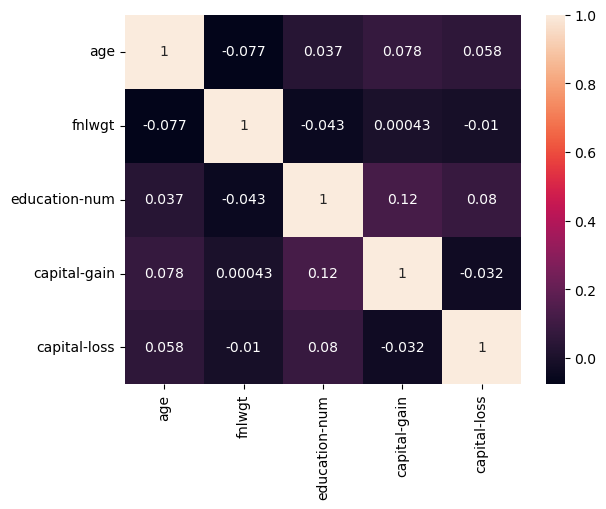

In [426]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [427]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40 hrs,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,<40 hrs,United-States,<=50K
2,38,Private,215646,HS-grad,9,Unmarried,Handlers-cleaners,Not-in-family,White,Male,0,0,40 hrs,United-States,<=50K
3,53,Private,234721,other,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40 hrs,United-States,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40 hrs,Cuba,<=50K


In [428]:
df[df==' ?']= np.nan

In [429]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [430]:
cat_column =['workclass','occupation']

## Feature Engineering

In [431]:
for column in cat_column:
    mode_category= df['workclass'].mode()[0]
    df[column].fillna(mode_category, inplace=True)

In [432]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
country           583
salary              0
dtype: int64

In [433]:
df.drop(['education-num','race','country', 'relationship'], axis=1,inplace=True)

In [434]:
df.head(2)

,age,workclass,fnlwgt,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,Unmarried,Adm-clerical,Male,2174,0,40 hrs,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,married,Exec-managerial,Male,0,0,<40 hrs,<=50K


In [435]:
cat_col=df.select_dtypes(include='object')

## Label Encoding

In [436]:
le= LabelEncoder()

In [437]:
for col in cat_col:
    df[col]= le.fit_transform(df[col])

In [438]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,6,77516,2,0,0,1,2174,0,0,0
1,50,5,83311,2,1,3,1,0,0,1,0
2,38,3,215646,4,0,5,1,0,0,0,0
3,53,3,234721,8,1,5,1,0,0,0,0
4,28,3,338409,2,1,10,0,0,0,0,0


In [439]:
x= df.drop(['salary'],axis=1)

In [440]:
y= df['salary']

In [441]:
x.head()

,age,workclass,fnlwgt,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week
0,39,6,77516,2,0,0,1,2174,0,0
1,50,5,83311,2,1,3,1,0,0,1
2,38,3,215646,4,0,5,1,0,0,0
3,53,3,234721,8,1,5,1,0,0,0
4,28,3,338409,2,1,10,0,0,0,0


In [442]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int32

## Train Test Split

In [443]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [444]:
x_train.shape, x_test.shape

((26048, 10), (6513, 10))

In [445]:
y_train.shape, y_test.shape

((26048,), (6513,))

## Model Building

## Logistic Regression

In [446]:
lr = LogisticRegression()

In [447]:
lr.fit(x_train, y_train)

LogisticRegression()

In [448]:
lr_pred=lr.predict(x_test)

In [449]:
lr_pred

array([0, 0, 0, ..., 1, 0, 0])

In [450]:
accuracy_score(y_test, lr_pred)

0.7985567326884692

In [451]:
report = classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4942
           1       0.73      0.27      0.39      1571

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.63      6513
weighted avg       0.79      0.80      0.76      6513



In [467]:
confusion_matrix(y_test, lr_pred)

array([[4784,  158],
       [1154,  417]], dtype=int64)

## Decision Tree

In [452]:
from sklearn.tree import DecisionTreeClassifier

In [453]:
dt= DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='random')

In [454]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [455]:
dt_pred=dt.predict(x_test)

In [456]:
dt_report = classification_report(y_test, dt_pred)

In [457]:
accuracy_score(y_test, dt_pred)

0.8080761553815446

In [458]:
print( dt_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4942
           1       0.60      0.61      0.61      1571

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [470]:
confusion_matrix(y_test, dt_pred)

array([[4298,  644],
       [ 606,  965]], dtype=int64)

## Random Forest

In [459]:
rf= RandomForestClassifier(max_samples=0.8, max_features=5)

In [460]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=5, max_samples=0.8)

In [461]:
rf_pred= rf.predict(x_test)

In [462]:
rf_pred

array([0, 0, 0, ..., 1, 0, 0])

In [463]:
rf_report= classification_report(y_test, rf_pred)

In [464]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.63      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [465]:
confusion_matrix(y_test, rf_pred)

array([[4614,  328],
       [ 575,  996]], dtype=int64)